# Import

In [16]:
import pandas as pd
import seaborn as sns
import missingno as msno
import json
import folium # pour affichage des données géographiques
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df_tree = pd.read_csv('../data/original/ESP_PUBLIC.IDENTITE_ARBRE.csv')

In [10]:
df_tree

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
0,28796,ESP29533,ESP29533,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7330521059871..."
1,28802,ESP29534,ESP29534,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7396645998576..."
2,28805,ESP29535,ESP29535,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7393760050367..."
3,28814,ESP29537,ESP29537,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7327578896097..."
4,24990,ESP29538,ESP29538,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7101806683940..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31605,46021,ESP41555,ESP41555,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7362096829728..."
31606,46022,ESP41556,ESP41556,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7355397923023..."
31607,46023,ESP41557,ESP41557,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7353772851058..."
31608,15434,ESP18761,ESP18761,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7242110392924..."


In [12]:
# on extrait la lat,longitude de la col geojson 

df_tree_json = pd.json_normalize(df_tree.GeoJSON.apply(json.loads))
df_tree  = pd.concat([df_tree,df_tree_json],axis=1)
df_tree[['longitude','latitude']] = pd.DataFrame(df_tree['coordinates'].to_list(),columns=['longitude','latitude'])
df_tree = df_tree.drop(['GeoJSON','type','coordinates'],axis=1)

In [13]:
df_tree.columns

Index(['ELEM_POINT_ID', 'CODE', 'NOM', 'GENRE', 'GENRE_DESC', 'CATEGORIE',
       'CATEGORIE_DESC', 'SOUS_CATEGORIE', 'SOUS_CATEGORIE_DESC',
       'CODE_PARENT', 'CODE_PARENT_DESC', 'ADR_SECTEUR', 'BIEN_REFERENCE',
       'GENRE_BOTA', 'ESPECE', 'VARIETE', 'STADEDEDEVELOPPEMENT', 'EQUIPE',
       'REMARQUES', 'ANNEEDEPLANTATION', 'RAISONDEPLANTATION',
       'TRAITEMENTCHENILLES', 'COURRIER', 'IDENTIFIANTPLU',
       'TYPEIMPLANTATIONPLU', 'INTITULEPROTECTIONPLU', 'ANNEEABATTAGE',
       'ESSOUCHEMENT', 'DIAMETREARBRE', 'CAUSEABATTAGE', 'COLLECTIVITE',
       'longitude', 'latitude'],
      dtype='object')

# Visualization

### Visualization missing data pattern

In [14]:
df_tree.isna().sum().div(len(df_tree)).sort_values(ascending=False)

EQUIPE                   1.000000
CAUSEABATTAGE            1.000000
DIAMETREARBRE            1.000000
ESSOUCHEMENT             1.000000
ANNEEABATTAGE            1.000000
COURRIER                 1.000000
TYPEIMPLANTATIONPLU      0.981019
INTITULEPROTECTIONPLU    0.981019
IDENTIFIANTPLU           0.981019
TRAITEMENTCHENILLES      0.932363
RAISONDEPLANTATION       0.896868
VARIETE                  0.855457
REMARQUES                0.832110
STADEDEDEVELOPPEMENT     0.101297
ESPECE                   0.077950
ANNEEDEPLANTATION        0.042771
GENRE_BOTA               0.025055
COLLECTIVITE             0.014900
longitude                0.000000
ELEM_POINT_ID            0.000000
CODE                     0.000000
BIEN_REFERENCE           0.000000
ADR_SECTEUR              0.000000
CODE_PARENT_DESC         0.000000
CODE_PARENT              0.000000
SOUS_CATEGORIE_DESC      0.000000
SOUS_CATEGORIE           0.000000
CATEGORIE_DESC           0.000000
CATEGORIE                0.000000
GENRE_DESC    

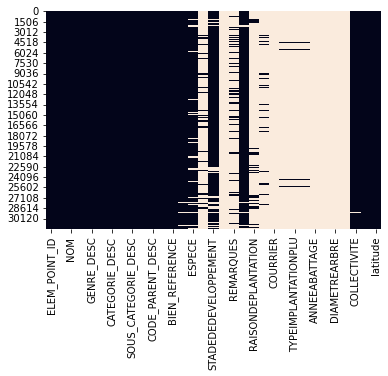

In [19]:
sns.heatmap(df_tree.isnull(), cbar=False);

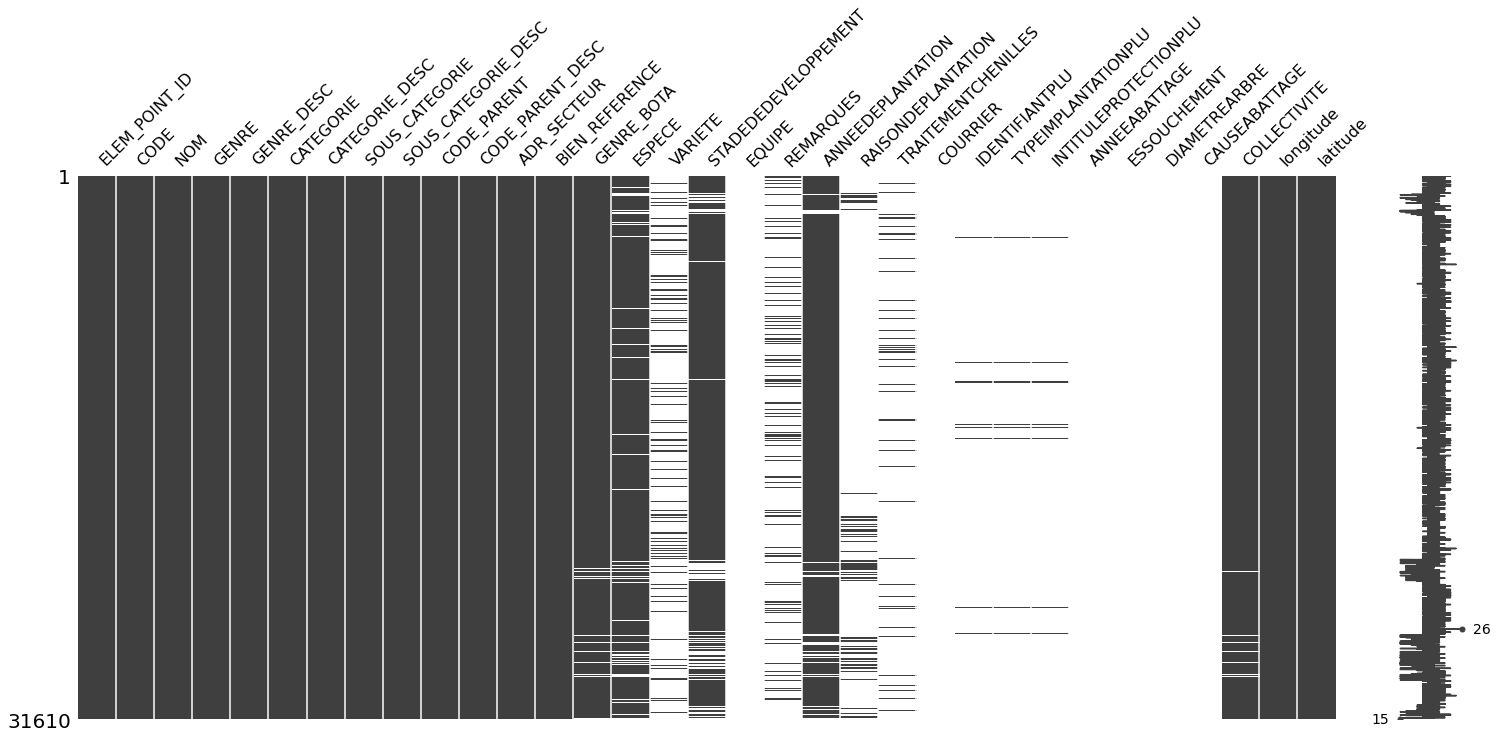

In [24]:
msno.matrix(df_tree);

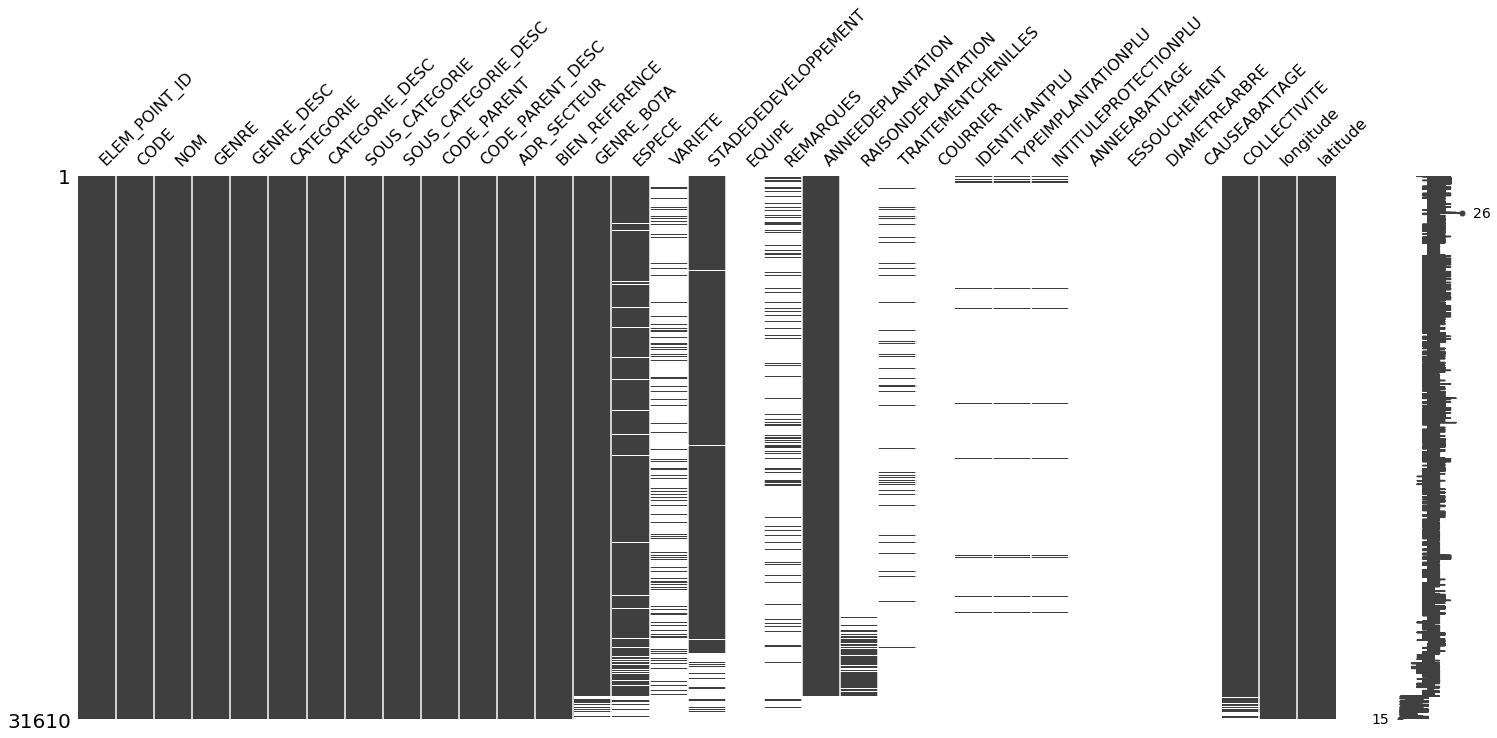

In [25]:
msno.matrix(df_tree.sort_values('ANNEEDEPLANTATION'));

On observe une augmentation de la raison de plantation en fonction de l'année de plantation:
- On ajoute plus de données maintenant qu'avant

## Visualization using geographical data

### Matplotlib

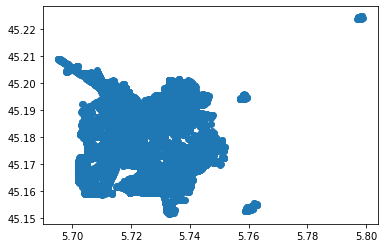

In [8]:
plt.scatter(data=df_tree,x='longitude',y='latitude');

### Folium

In [9]:
path_export_map = '../visu/grenoblemap.html'

In [10]:
location_gre=[45.166672,5.71667]
grenoble = folium.Map(location = location_gre,zoom_start=13)

for i,row in df_tree.iterrows():
    loc = (row['latitude'],row['longitude'])
    if np.isnan(row['ANNEEDEPLANTATION']):
        folium.Circle(loc,radius=1,fill_opacity=0.8,color='red').add_to(grenoble)
    else:
        folium.Circle(loc,radius=1,fill_opacity=0.8,color='green').add_to(grenoble)
grenoble.save(path_export_map)

# Clean up

## Dropping features without information

In [26]:
na = df_tree.isna().sum().div(len(df_tree)).sort_values(ascending=False)

In [27]:
na.where(na>0.5).dropna()

EQUIPE                   1.000000
CAUSEABATTAGE            1.000000
DIAMETREARBRE            1.000000
ESSOUCHEMENT             1.000000
ANNEEABATTAGE            1.000000
COURRIER                 1.000000
TYPEIMPLANTATIONPLU      0.981019
INTITULEPROTECTIONPLU    0.981019
IDENTIFIANTPLU           0.981019
TRAITEMENTCHENILLES      0.932363
RAISONDEPLANTATION       0.896868
VARIETE                  0.855457
REMARQUES                0.832110
dtype: float64

In [28]:
col_na = na.where(na>0.5).dropna().index

In [29]:
col_na

Index(['EQUIPE', 'CAUSEABATTAGE', 'DIAMETREARBRE', 'ESSOUCHEMENT',
       'ANNEEABATTAGE', 'COURRIER', 'TYPEIMPLANTATIONPLU',
       'INTITULEPROTECTIONPLU', 'IDENTIFIANTPLU', 'TRAITEMENTCHENILLES',
       'RAISONDEPLANTATION', 'VARIETE', 'REMARQUES'],
      dtype='object')

In [30]:
df_tree = df_tree.drop(col_na,axis=1)

In [31]:
df_tree

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,CODE_PARENT_DESC,ADR_SECTEUR,BIEN_REFERENCE,GENRE_BOTA,ESPECE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,COLLECTIVITE,longitude,latitude
0,28796,ESP29533,ESP29533,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP437,Tr quartiers talu architecture,6,AR29533,Pinus,NaN,Arbre adulte,1975.0,Ville de Grenoble,5.733052,45.160874
1,28802,ESP29534,ESP29534,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1393,Désserte des alisiers mail,6,AR29534,Platanus,acerifolia,Arbre adulte,1975.0,Ville de Grenoble,5.739665,45.163463
2,28805,ESP29535,ESP29535,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1393,Désserte des alisiers mail,6,AR29535,Platanus,acerifolia,Arbre adulte,1975.0,Ville de Grenoble,5.739376,45.163737
3,28814,ESP29537,ESP29537,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP438,La piste pel de l'aire de jeux,6,AR29537,Carpinus,betulus,Arbre adulte,1975.0,Ville de Grenoble,5.732758,45.165827
4,24990,ESP29538,ESP29538,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP430,R Salengro sép Libé Schweitz,3,AR29538,Cercis,siliquastrum,Arbre adulte,2006.0,Grenoble Alpes Métropole,5.710181,45.175196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31605,46021,ESP41555,ESP41555,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP593,Parc 2 R Herminier ch de Ronde,2,AR41555,NaN,NaN,NaN,NaN,NaN,5.736210,45.195236
31606,46022,ESP41556,ESP41556,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1034,Parc 2 R Hermin M Leclerq,2,AR41556,NaN,NaN,NaN,NaN,NaN,5.735540,45.195325
31607,46023,ESP41557,ESP41557,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1034,Parc 2 R Hermin M Leclerq,2,AR41557,NaN,NaN,NaN,NaN,NaN,5.735377,45.195194
31608,15434,ESP18761,ESP18761,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP336,R M Gontard angle M Deprez,2,AR18761,Prunus,serrulata,Arbre adulte,1995.0,Grenoble Alpes Métropole,5.724211,45.192098


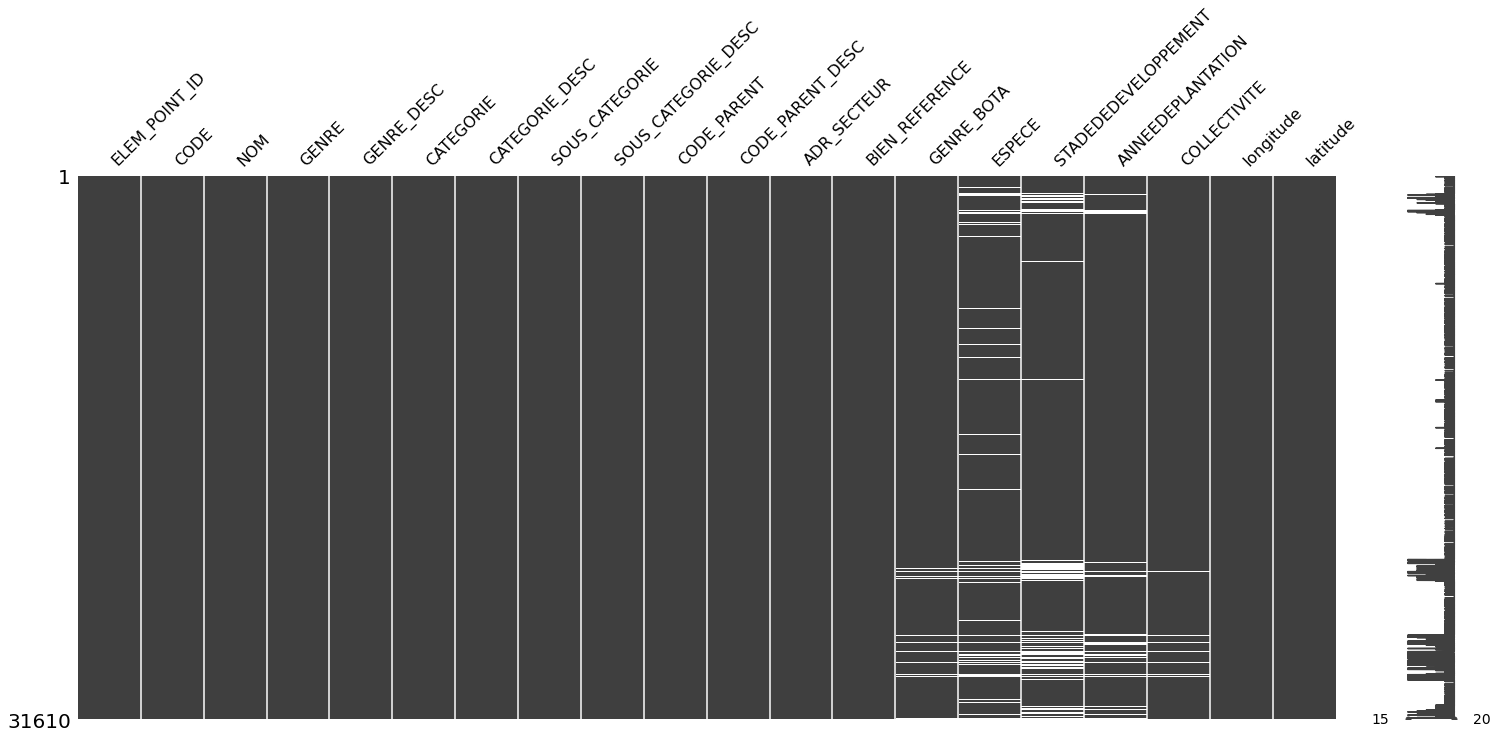

In [33]:
msno.matrix(df_tree);

## Dropping NAN values for année de plantation 

In [18]:
df_tree['ANNEEDEPLANTATION'].isna().value_counts()

False    30258
True      1352
Name: ANNEEDEPLANTATION, dtype: int64

In [19]:
na_trees = df_tree[df_tree['ANNEEDEPLANTATION'].isna()]

In [20]:
df_tree = df_tree.dropna(axis = 0,subset=['ANNEEDEPLANTATION'])

In [21]:
df_tree['ANNEEDEPLANTATION'].isna().value_counts()

False    30258
Name: ANNEEDEPLANTATION, dtype: int64

## Export des données en pickle

In [22]:
path_clean = '../data/modified/trees_clean.pkl'
path_na_tree = '../data/modified/trees_na.pkl'

In [25]:
df_tree.to_pickle(path_clean)
na_trees.to_pickle(path_na_tree)